<a href="https://colab.research.google.com/github/kavyakapoor200/Ecommerce-insight-toolkit/blob/main/Kavya_Kapoor_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

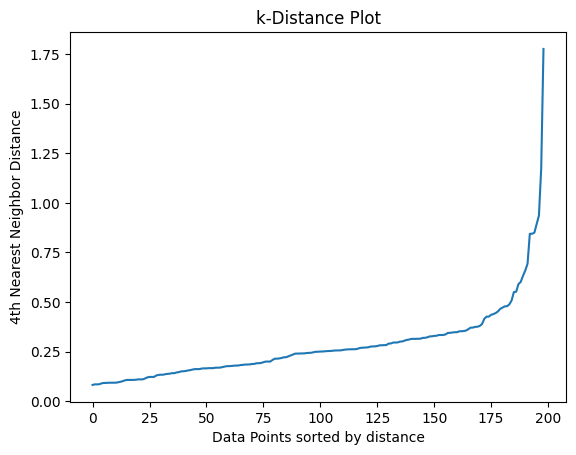

Number of noise points: 0
Davies-Bouldin Index: 0.3923439990934092
Silhouette Score: 0.43630712284256395


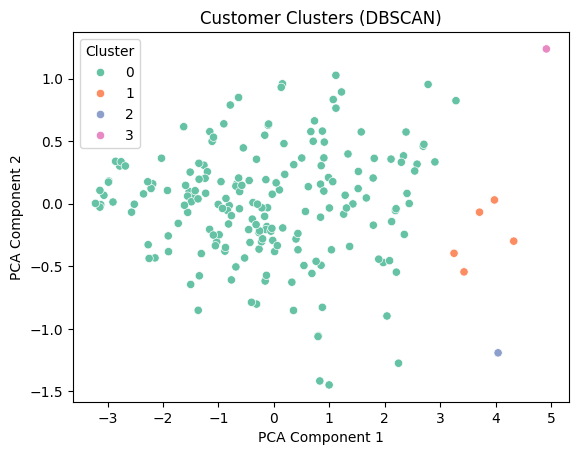

In [102]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

# Loading the datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merging the datasets
data = pd.merge(transactions, customers, on='CustomerID')

# Feature engineering
data['TotalSpend'] = data['Quantity'] * data['Price']
customer_data = data.groupby('CustomerID').agg({
    'TotalSpend': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count'  # Purchase frequency refering to customers
}).reset_index()

# Normalizing data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['TotalSpend', 'Quantity', 'TransactionID']])

# Applying PCA for dimensionality reduction of scaler data for better visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Determining optimal eps using k-distance plot
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(pca_data)
distances, indices = neighbors_fit.kneighbors(pca_data)

# Sorting distances to find the elbow point for the eps
distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.title('k-Distance Plot')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.show()

# Clustering with DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=1)  # Increased eps for broader clusters
customer_data['Cluster'] = dbscan.fit_predict(pca_data)

#checking the noise points
noise_count = (customer_data['Cluster'] == -1).sum()
print(f"Number of noise points: {noise_count}")

# Check if valid clusters exist
if len(valid_clusters) > 0:
    # Evaluation metrics (only for valid clusters)
    db_index = davies_bouldin_score(pca_data[valid_clusters.index], valid_clusters['Cluster'])
    sil_score = silhouette_score(pca_data[valid_clusters.index], valid_clusters['Cluster'])

    print(f"Davies-Bouldin Index: {db_index}")
    print(f"Silhouette Score: {sil_score}")

else:
    print("No valid clusters found. Adjust eps and min_samples.")

# Visualization
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=customer_data['Cluster'], palette='Set2', legend='full')
plt.title("Customer Clusters (DBSCAN)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Save results
customer_data.to_csv("Kavya_Task3_DBSCANClusters.csv", index=False)
